In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/home/ahoag/Git/lightsheet_helper_scripts/clearmap2/notebooks'

In [3]:
data_file = '../data/LaVision-control-observer-pcounts-linreg.csv'

In [4]:
df = pd.read_csv(data_file)

In [5]:
df

,control,treatment,region,Estimate,Std. Error,t value,Pr(>|t|),fdr_adj_pval,status
0,control,observer,"Frontal pole, layer 1",0.000027,0.000021,1.270170,0.216724,0.894225,success
1,control,observer,"Frontal pole, layer 2/3",-0.000004,0.000007,-0.568116,0.575461,0.952124,success
2,control,observer,"Primary motor area, Layer 2/3",-0.002362,0.001513,-1.561559,0.132048,0.879059,success
3,control,observer,"Primary motor area, Layer 5",-0.000879,0.000794,-1.107241,0.279636,0.913933,success
4,control,observer,"Primary motor area, Layer 6a",-0.001161,0.000896,-1.296299,0.207729,0.894225,success
...,...,...,...,...,...,...,...,...,...
461,control,observer,choroid plexus,0.000087,0.001028,0.084907,0.933070,0.970743,success
462,control,observer,third ventricle,0.000012,0.000193,0.062494,0.950709,0.972435,success
463,control,observer,cerebral aqueduct,0.000217,0.000147,1.471371,0.154742,0.894225,success
464,control,observer,fourth ventricle,-0.000441,0.000402,-1.098736,0.283252,0.913933,success


In [6]:
df.columns

Index(['control', 'treatment', 'region', 'Estimate', 'Std. Error', 't value',
       'Pr(>|t|)', 'fdr_adj_pval', 'status'],
      dtype='object')

In [7]:
p_values = df['Pr(>|t|)']

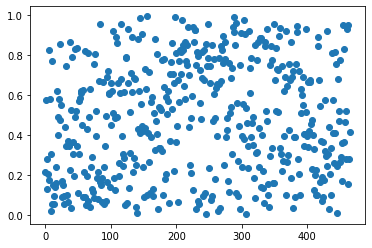

In [8]:
plt.scatter([x for x in range(len(p_values))],p_values)

(array([58., 46., 46., 50., 45., 42., 51., 47., 47., 34.]),
 array([0.0075887 , 0.10627441, 0.20496011, 0.30364581, 0.40233151,
        0.50101721, 0.59970291, 0.69838861, 0.79707431, 0.89576001,
        0.99444571]),
 <BarContainer object of 10 artists>)

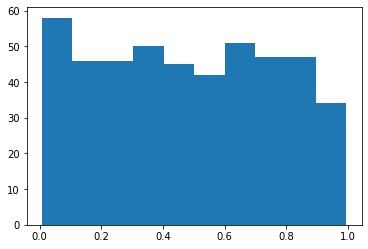

In [9]:
plt.hist(p_values)

In [10]:
def bh(p_values):
    # Benjamini-Hochberg correction of p-values
    # Keep a dictionary that maps original index in p-vlaue li
    # Sort
    sorted_p_values = sorted(p_values)
    adjusted_p_values = np.zeros_like(sorted_p_values)
    # Fill them from highest to lowest
    adjusted_p_values[-1] = sorted_p_values[-1]
    for p_value_index in range(len(sorted_p_values)-2,-1,-1):
        next_highest = adjusted_p_values[p_value_index+1]
        rank_current = p_value_index+1
        mod_current = sorted_p_values[p_value_index] * (len(sorted_p_values)/rank_current)
        adjusted_p_value = min(next_highest,mod_current)
        adjusted_p_values[p_value_index] = adjusted_p_value
    # return them in the original order
    
    return adjusted_p_values

In [12]:
my_dict_list = [
    {'id':'A','p-value':0.9},
    {'id':'B','p-value':0.1},
    {'id':'C','p-value':0.2},
    {'id':'D','p-value':0.04},
]


In [15]:
sorted_dict_list = sorted(my_dict_list,key=lambda x: x['p-value'])
sorted_dict_list

[{'id': 'D', 'p-value': 0.04},
 {'id': 'B', 'p-value': 0.1},
 {'id': 'C', 'p-value': 0.2},
 {'id': 'A', 'p-value': 0.9}]

In [17]:
sorted_p_values = [x['p-value'] for x in sorted_dict_list]
adjusted_p_values = bh(sorted_p_values)
adjusted_p_values

array([0.16      , 0.2       , 0.26666667, 0.9       ])

In [18]:
for ii in range(len(sorted_dict_list)):
    sorted_dict_list[ii]['adjusted_p-value'] = adjusted_p_values[ii]

In [19]:
sorted_dict_list

[{'id': 'D', 'p-value': 0.04, 'adjusted_p-value': 0.16},
 {'id': 'B', 'p-value': 0.1, 'adjusted_p-value': 0.2},
 {'id': 'C', 'p-value': 0.2, 'adjusted_p-value': 0.26666666666666666},
 {'id': 'A', 'p-value': 0.9, 'adjusted_p-value': 0.9}]

In [11]:
p_values = [0.1,0.9,0.5,0.2]

In [70]:
argsort = np.argsort(p_values)

In [71]:
a=bh(p_values)
a

array([0.4       , 0.4       , 0.66666667, 0.9       ])

In [72]:
a[argsort]

array([0.4       , 0.9       , 0.66666667, 0.4       ])

In [15]:
len(sorted_p_values)

466

In [20]:
adjusted_p_values = np.zeros_like(sorted_p_values)

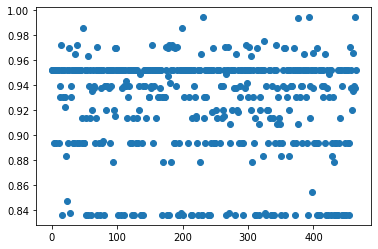

In [44]:
plt.scatter([x for x in range(len(adjusted_p_values))],adjusted_p_values)

(array([ 63.,   1.,  11.,  57.,  27.,  48.,  55., 162.,  36.,   6.]),
 array([0.83642324, 0.85222548, 0.86802773, 0.88382998, 0.89963223,
        0.91543447, 0.93123672, 0.94703897, 0.96284121, 0.97864346,
        0.99444571]),
 <BarContainer object of 10 artists>)

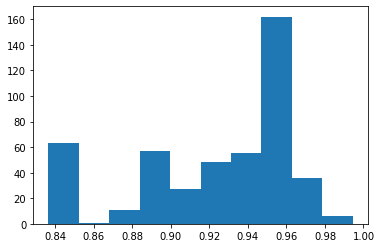

In [45]:
plt.hist(adjusted_p_values)

In [43]:
np.random.shuffle(adjusted_p_values)

In [78]:
l=[1,2,4,3,0,8]
# np.array(sorted(l))

In [79]:
[np.argsort(l)]

[array([4, 0, 1, 3, 2, 5])]